In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
train_data = pd.read_csv('train.csv', index_col='ID')
train_data.target.unique()

array([1, 0])

In [3]:
print("Dataset: {} samples, {} features".format(train_data.shape[0], train_data.shape[1] - 1))

Dataset: 114321 samples, 131 features


In [4]:
N = train_data.shape[0]
N0 = train_data[train_data.target == 0].shape[0]
N1 = train_data[train_data.target == 1].shape[0]
train_data.columns

Index(['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=132)

In [5]:
# We get the non-continuous features
nonnum_cols = {}
for i in range(1, 132):
    if type(train_data['v' + str(i)].iloc[0]) != np.float64:
        nonnum_cols['v' + str(i)] = train_data['v' + str(i)].unique()

In [6]:
len(nonnum_cols)

23

Feature v79
Proportion of NaN: 0.00%


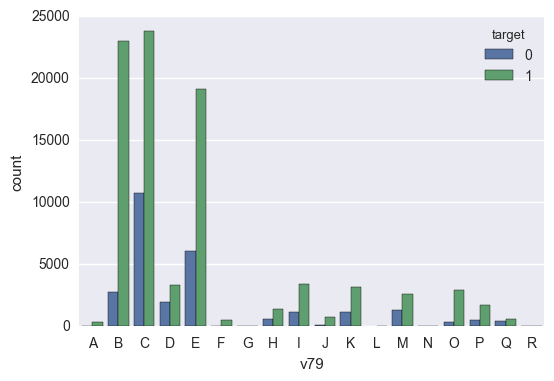

Feature v72
Proportion of NaN: 0.00%


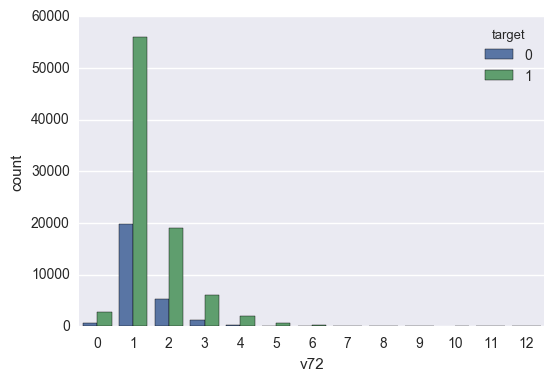

Feature v56
Proportion of NaN: 6.02%


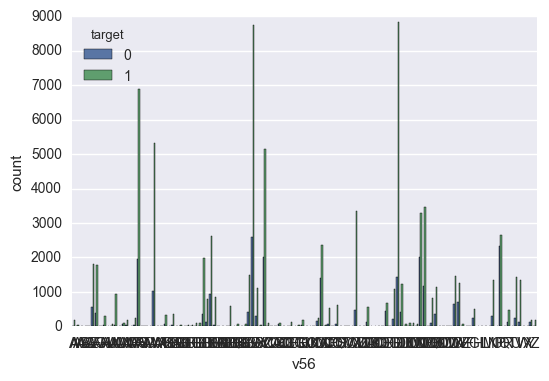

Feature v110
Proportion of NaN: 0.00%


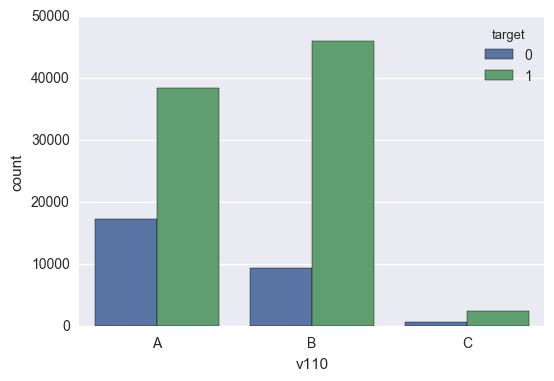

Feature v3
Proportion of NaN: 3.02%


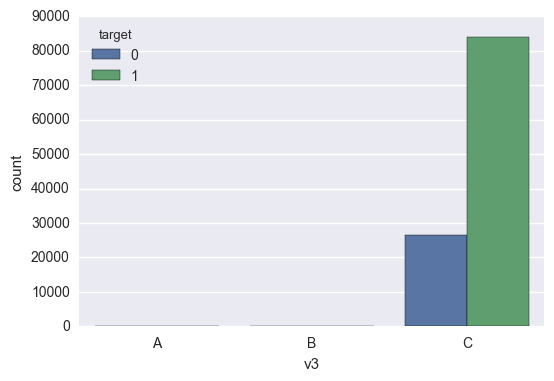

Feature v125
Proportion of NaN: 0.07%


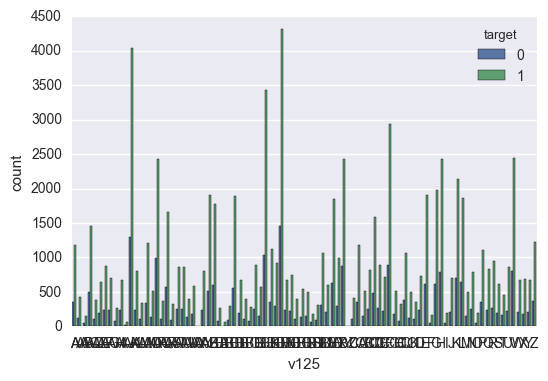

Feature v74
Proportion of NaN: 0.00%


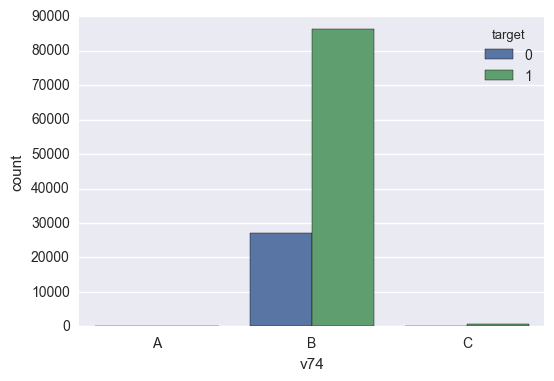

Feature v62
Proportion of NaN: 0.00%


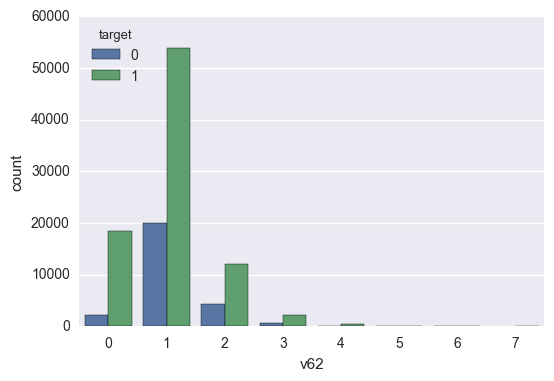

Feature v129
Proportion of NaN: 0.00%


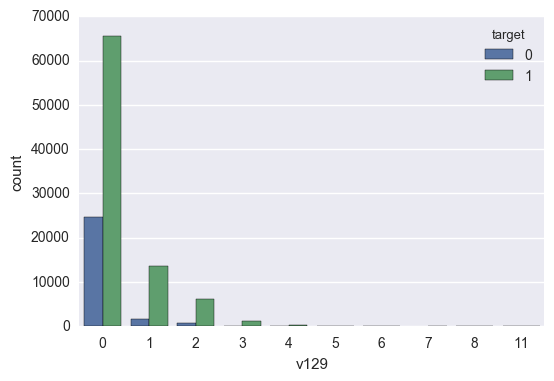

Feature v91
Proportion of NaN: 0.00%


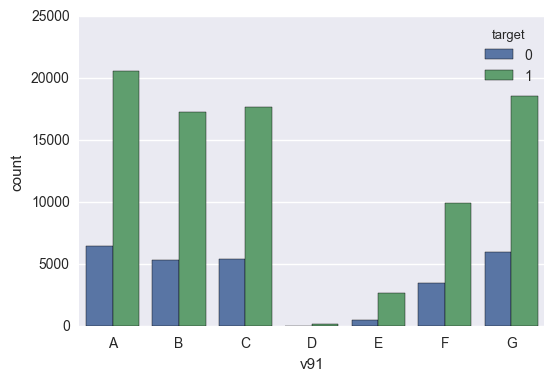

Feature v107
Proportion of NaN: 0.00%


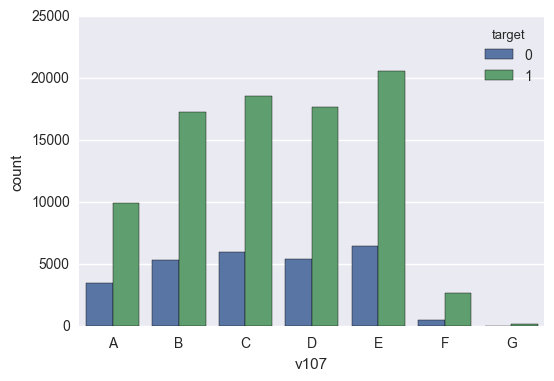

Feature v47
Proportion of NaN: 0.00%


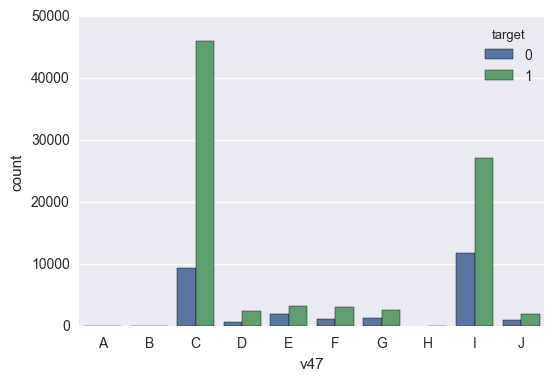

Feature v66
Proportion of NaN: 0.00%


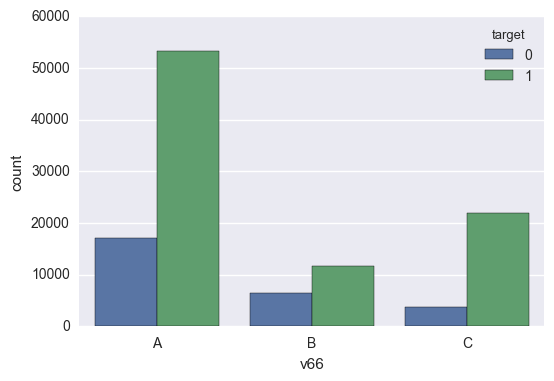

Feature v24
Proportion of NaN: 0.00%


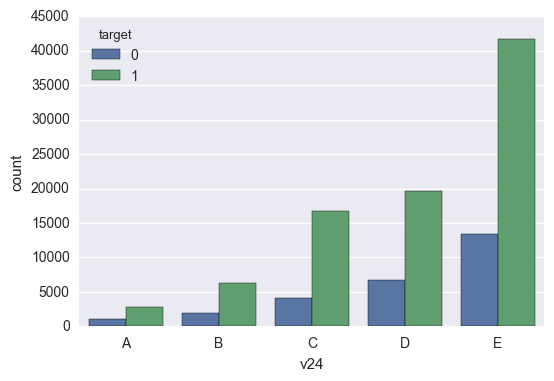

Feature v31
Proportion of NaN: 3.02%


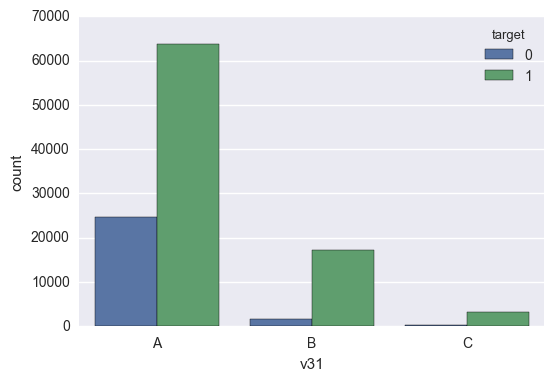

Feature v75
Proportion of NaN: 0.00%


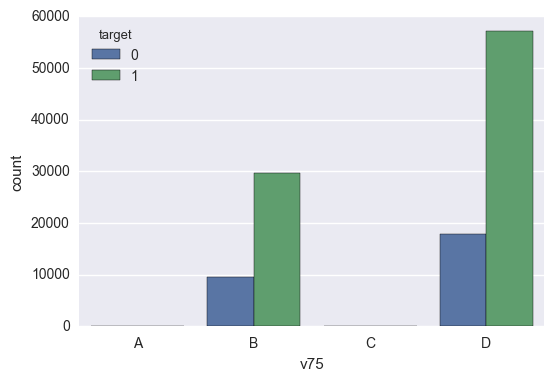

Feature v112
Proportion of NaN: 0.33%


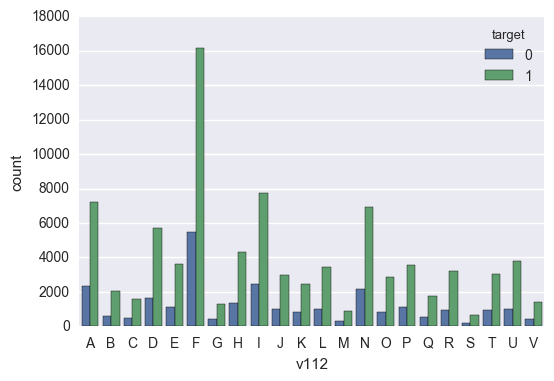

Feature v52
Proportion of NaN: 0.00%


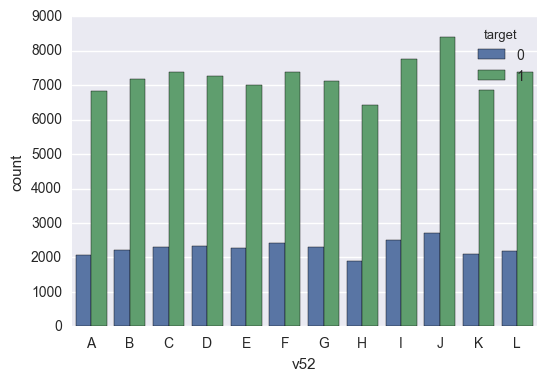

Feature v30
Proportion of NaN: 52.58%


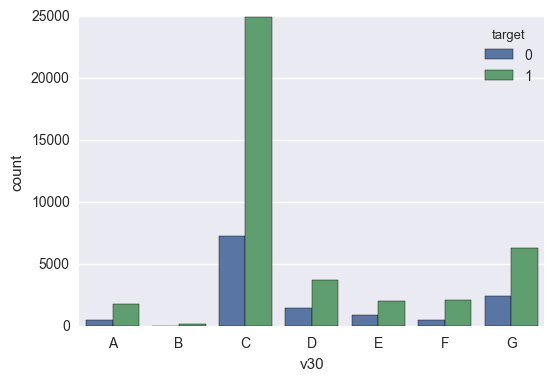

Feature v113
Proportion of NaN: 48.38%


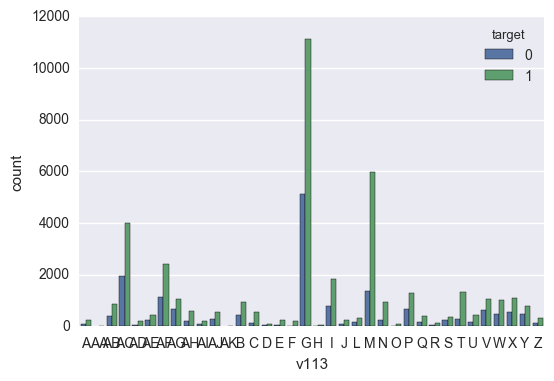

Feature v71
Proportion of NaN: 0.00%


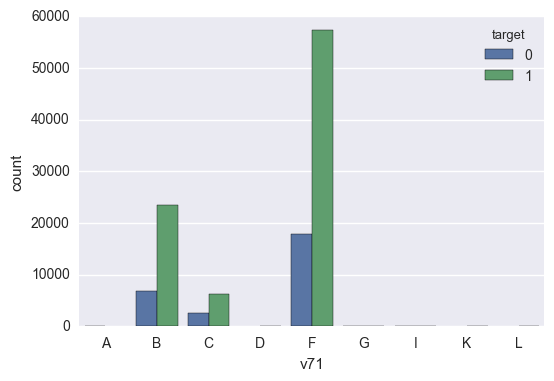

Feature v38
Proportion of NaN: 0.00%


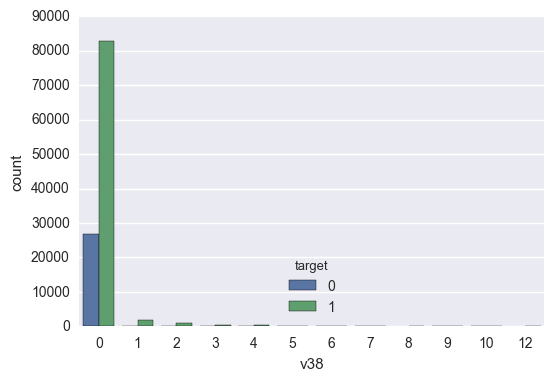

In [7]:
for v in nonnum_cols:
    if v == 'v22':
        continue
    print("Feature {}".format(v))
    print("Proportion of NaN: {:0.2f}%".format(train_data[v].isnull().sum() / N * 100))
    sns.countplot(x=v, hue='target', data=train_data, order=np.sort(train_data[v].dropna().unique()))
    plt.show()

In [ ]:
train_data_0 = train_data[train_data.target == 0]
train_data_1 = train_data[train_data.target == 1]

In [ ]:
for v in nonnum_cols:
    if v == 'v22':
        continue
    print("Feature {}".format(v))
    print("Proportion of NaN (target = 0): {:0.2f}%".format(train_data_0[v].isnull().sum() / N0 * 100))
    sns.countplot(x=v, data=train_data_0, order=np.sort(train_data[v].dropna().unique()))
    plt.show()
    print("Proportion of NaN (target = 1): {:0.2f}%".format(train_data_1[v].isnull().sum() / N1 * 100))
    sns.countplot(x=v, data=train_data_1, order=np.sort(train_data[v].dropna().unique()))
    plt.show()

In [ ]:
propors = []
for v in nonnum_cols:
    propors.append([v, train_data[['target', v]].groupby([v]).count().max()['target'] / N * 100, nonnum_cols[v].shape[0]])

In [ ]:
print(tabulate(sorted(propors, key=(lambda x: x[1]), reverse=True), headers=['Feature', '% most recurrent value', '# distinct values'], tablefmt='orgtbl'))

In [ ]:
sns.countplot(x='v22', data=train_data, order=np.sort(train_data.v22.dropna().unique()))
plt.show()

In [ ]:
train_data[['target', 'v22']].groupby(['v22']).count()

In [ ]:
sns.countplot(x='v22', hue='target', data=train_data.dropna())

In [ ]:
plt.show()